In [1]:

import numpy as np
import math
import matplotlib.pyplot as plt
#Initialize transformation matrix for predictions
#bm, br, bl, tr, tl
print('bm', 'br', 'bl', 'tr', 'tl')
T_expected_narrow = np.reshape([.5, 0, 0, .25, .25, 
                                0, 0, .75, .25, 0, 
                                0, .75, 0, 0, .25, 
                                .25, .25, 0, 0, .5, 
                                .25, 0, .25, .5, 0], (5, 5))
print(T_expected_narrow)
T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
T_expected_broad = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                              T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                              T_expected_broad[2]/np.sum(T_expected_broad[2])])
print('bm', 'b', 't')
print(T_expected_broad, np.sum(T_expected_broad, axis = 0), np.sum(T_expected_broad, axis = 1))
print(T_expected_broad_norm, np.sum(T_expected_broad_norm, axis = 0), np.sum(T_expected_broad_norm, axis = 1))

bm br bl tr tl
[[0.5  0.   0.   0.25 0.25]
 [0.   0.   0.75 0.25 0.  ]
 [0.   0.75 0.   0.   0.25]
 [0.25 0.25 0.   0.   0.5 ]
 [0.25 0.   0.25 0.5  0.  ]]
bm b t
[[0.5 0.  0.5]
 [0.  1.5 0.5]
 [0.5 0.5 1. ]] [1. 2. 2.] [1. 2. 2.]
[[0.5  0.   0.5 ]
 [0.   0.75 0.25]
 [0.25 0.25 0.5 ]] [0.75 1.   1.25] [1. 1. 1.]


In [2]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_narrow.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 1. 1. 1. 1.]


In [3]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 2. 2.]


In [4]:
#narrow observations array
T_ob = np.asarray([[8.09031044, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, 7.05550329, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, 8.46660395, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, 4.32737535, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  5.17403575]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2), np.sum(T_ob_norm, axis = 1), np.sum(T_ob_norm, axis = 0))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 1)
print("\nEigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)

[[8.09031044 1.31702728 1.41110066 2.82220132 3.01034807]
 [3.66886171 7.05550329 6.67920978 3.76293509 1.97554092]
 [2.16368768 6.02069614 8.46660395 3.19849483 3.19849483]
 [4.60959548 2.0696143  3.95108184 4.32737535 3.95108184]
 [4.1392286  2.72812794 2.91627469 3.2925682  5.17403575]] 
 [[0.49 0.08 0.08 0.17 0.18]
 [0.16 0.3  0.29 0.16 0.09]
 [0.09 0.26 0.37 0.14 0.14]
 [0.24 0.11 0.21 0.23 0.21]
 [0.23 0.15 0.16 0.18 0.28]] [1. 1. 1. 1. 1.] [1.20887506 0.90413586 1.10945963 0.88013675 0.8973927 ]

Eigenvector for eigenvalue 1 of T_ob_norm:
[25.5-0.j 17.6-0.j 21.7-0.j 17.4-0.j 17.8-0.j]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [5]:
# Impossible transitions - where none was predicted, but it happened -> the transition happened by breaking off, not by moving along surface
impossible = np.zeros((5,5))
impossible[T_expected_narrow == 0] = T_ob_norm[T_expected_narrow == 0]
#impossible[T_expected_narrow != 0] = 0
print(np.around(impossible,2))

[[0.   0.08 0.08 0.   0.  ]
 [0.16 0.3  0.   0.   0.09]
 [0.09 0.   0.37 0.14 0.  ]
 [0.   0.   0.21 0.23 0.  ]
 [0.   0.15 0.   0.   0.28]]


In [6]:
#broad observations array
T_obb = np.asarray([[8.09031044, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, 7.05550329, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, 8.46660395, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, 4.32737535, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  5.17403575]])
T_eb = np.vstack([T_obb[0], 
                             (T_obb[1] + T_obb[2]) , 
                             (T_obb[3] + T_obb[4])])
T_obb = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 1)
print("Eigenvector for eigenvalue 1 of T_obb_norm:")
print(evec_one, eigvec_one, eigvecs, eigvals)

[[ 8.09031044  2.72812794  5.83254939]
 [ 5.83254939 28.22201316 12.13546567]
 [ 8.74882408 11.66509877 16.74506114]] 
 [[0.49 0.16 0.35]
 [0.13 0.61 0.26]
 [0.24 0.31 0.45]] [1. 1. 1.]
Eigenvector for eigenvalue 1 of T_obb_norm:
[25.7 39.2 35.1] [-0.43898959 -0.66895335 -0.5998246 ] [[-0.43898959 -0.56437202 -0.41274241]
 [-0.66895335  0.79317834 -0.40373762]
 [-0.5998246  -0.22880632  0.81648003]] [1.         0.40386228 0.1436443 ]


In [7]:
# Impossible transitions - where none was predicted, but it happened -> the transition happened by breaking off, not by moving along surface
impossible = np.zeros((3,3))
impossible[T_expected_broad == 0] = T_obb[T_expected_broad == 0]
#impossible[T_expected_narrow != 0] = 0
print(impossible)



[[0.         2.72812794 0.        ]
 [5.83254939 0.         0.        ]
 [0.         0.         0.        ]]



TRANSITION THRESHOLD  30
[[12. 10.]
 [10. 15.]] 
 [[0.55 0.45]
 [0.4  0.6 ]] [1. 1.]
[46.80851064 53.19148936]

TRANSITION THRESHOLD  40
[[10. 10.]
 [10. 13.]] 
 [[0.5  0.5 ]
 [0.43 0.57]] [1. 1.]
[46.51162791 53.48837209]

TRANSITION THRESHOLD  50
[[ 8. 10.]
 [10. 10.]] 
 [[0.44 0.56]
 [0.5  0.5 ]] [1. 1.]
[47.36842105 52.63157895]

TRANSITION THRESHOLD  60
[[ 8. 10.]
 [10.  8.]] 
 [[0.44 0.56]
 [0.56 0.44]] [1. 1.]
[50. 50.] [50. 50.]

TRANSITION THRESHOLD  70
[[ 8. 10.]
 [10.  8.]] 
 [[0.44 0.56]
 [0.56 0.44]] [1. 1.]
[50. 50.] [50. 50.]

TRANSITION THRESHOLD  80
[[ 7. 10.]
 [10.  7.]] 
 [[0.41 0.59]
 [0.59 0.41]] [1. 1.]
[50. 50.] [50. 50.]

TRANSITION THRESHOLD  30
[[18. 33.]
 [33. 46.]] 
 [[0.35 0.65]
 [0.42 0.58]] [1. 1.]
[39.23076923 60.76923077]

TRANSITION THRESHOLD  40
[[11. 33.]
 [33. 39.]] 
 [[0.25 0.75]
 [0.46 0.54]] [1. 1.]
[37.93103448 62.06896552]

TRANSITION THRESHOLD  50
[[10. 33.]
 [33. 31.]] 
 [[0.23 0.77]
 [0.52 0.48]] [1. 1.]
[40.18691589 59.81308411]

TRANSITIO

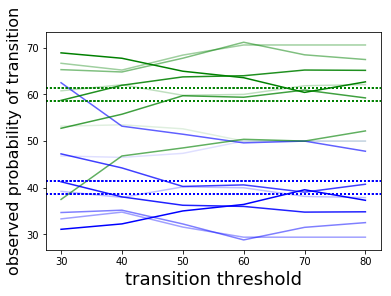

In [18]:
#broad observations array
trans_runs= np.load('trans_round2.npy')[()]
num_top_keys = 4
num_full_keys = 6
num_tran_keys = 5
for vid in range(0, len(trans_runs[30][0][2])):
    x1 = []
    x2 = []
    
    trans_runs= np.load('trans_round2.npy')[()]
    trans_threshes = [30, 40, 50]

    for trans_fil in trans_threshes:
        print("\nTRANSITION THRESHOLD ", trans_fil)

        #Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
        Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[trans_fil][0]
        sums = np.sum
        Tb_sums = [sums(Top_bottoms[vid, c]) for c in range(num_top_keys)]
        Fc_sums = [sums(Full_classif[vid, c]) for c in range(num_full_keys)]
        Nt_sums = N_transitions[vid]#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
        T_obb = Nt_sums
        T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
        print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        print(evec_one)
        #print("Eigenvector for eigenvalue 1 of T_obb_norm:")
        #print(evec_one, eigvec_one, eigvecs, eigvals)
        x1.append(evec_one[0])
        x2.append(evec_one[1])


    trans_runs= np.load('trans_round2_2.npy')[()]
    trans_threshes = [60, 70, 80]


    
    for trans_fil in trans_threshes:
        print("\nTRANSITION THRESHOLD ", trans_fil)

        #Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
        Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[trans_fil][0]
        sums = np.sum
        Tb_sums = [sums(Top_bottoms[vid, c]) for c in range(num_top_keys)]
        Fc_sums = [sums(Full_classif[vid, c]) for c in range(num_full_keys)]
        Nt_sums = N_transitions[vid]#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
        T_obb = Nt_sums
        T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
        print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        print(evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm))
        #print("Eigenvector for eigenvalue 1 of T_obb_norm:")
        #print(evec_one, eigvec_one, eigvecs, eigvals)
        x1.append(evec_one[0])
        x2.append(evec_one[1])

    trans_threshes = [30, 40, 50, 60, 70, 80]
    plt.plot(trans_threshes, x1, c = 'blue', alpha = (vid+1)/len(trans_runs[80][0][2]), ls = '-')
    plt.plot(trans_threshes, x2, c = 'green', alpha = (vid+1)/len(trans_runs[80][0][2]), ls = '-')

    plt.axhline(y=(38.6), c = 'blue', ls = ':')
    plt.axhline(y=(58.5), c = 'green', ls = ':')
    plt.axhline(y=(41.5), c = 'blue', ls = ':')
    plt.axhline(y=(61.4), c = 'green', ls = ':')
    plt.xlabel('transition threshold', fontsize=18)
    plt.ylabel('observed probability of transition', fontsize=16)
#plt.ylim(0, 50)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')


TRANSITION THRESHOLD  30
[[12. 10.]
 [10. 15.]] 
 [[0.55 0.45]
 [0.4  0.6 ]] [1. 1.]
[46.80851064 53.19148936]

TRANSITION THRESHOLD  40
[[10. 10.]
 [10. 13.]] 
 [[0.5  0.5 ]
 [0.43 0.57]] [1. 1.]
[46.51162791 53.48837209]

TRANSITION THRESHOLD  50
[[ 8. 10.]
 [10. 10.]] 
 [[0.44 0.56]
 [0.5  0.5 ]] [1. 1.]
[47.36842105 52.63157895]

TRANSITION THRESHOLD  60
[[ 8. 10.]
 [10.  8.]] 
 [[0.44 0.56]
 [0.56 0.44]] [1. 1.]
[50. 50.] [50. 50.]

TRANSITION THRESHOLD  70
[[ 8. 10.]
 [10.  8.]] 
 [[0.44 0.56]
 [0.56 0.44]] [1. 1.]
[50. 50.] [50. 50.]

TRANSITION THRESHOLD  80
[[ 7. 10.]
 [10.  7.]] 
 [[0.41 0.59]
 [0.59 0.41]] [1. 1.]
[50. 50.] [50. 50.]

TRANSITION THRESHOLD  30
[[18. 33.]
 [33. 46.]] 
 [[0.35 0.65]
 [0.42 0.58]] [1. 1.]
[39.23076923 60.76923077]

TRANSITION THRESHOLD  40
[[11. 33.]
 [33. 39.]] 
 [[0.25 0.75]
 [0.46 0.54]] [1. 1.]
[37.93103448 62.06896552]

TRANSITION THRESHOLD  50
[[10. 33.]
 [33. 31.]] 
 [[0.23 0.77]
 [0.52 0.48]] [1. 1.]
[40.18691589 59.81308411]

TRANSITIO

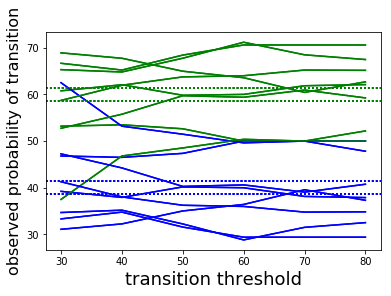

In [14]:
#broad observations array
trans_runs= np.load('trans_round2.npy')[()]
num_top_keys = 4
num_full_keys = 6
num_tran_keys = 5
for vid in range(0, len(trans_runs[30][0][2])):
    x1 = []
    x2 = []
    
    trans_runs= np.load('trans_round2.npy')[()]
    trans_threshes = [30, 40, 50]

    for trans_fil in trans_threshes:
        print("\nTRANSITION THRESHOLD ", trans_fil)

        #Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
        Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[trans_fil][0]
        sums = np.sum
        Tb_sums = [sums(Top_bottoms[vid, c]) for c in range(num_top_keys)]
        Fc_sums = [sums(Full_classif[vid, c]) for c in range(num_full_keys)]
        Nt_sums = N_transitions[vid]#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
        T_obb = Nt_sums
        T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
        print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        print(evec_one)
        #print("Eigenvector for eigenvalue 1 of T_obb_norm:")
        #print(evec_one, eigvec_one, eigvecs, eigvals)
        x1.append(evec_one[0])
        x2.append(evec_one[1])


    trans_runs= np.load('trans_round2_2.npy')[()]
    trans_threshes = [60, 70, 80]


    
    for trans_fil in trans_threshes:
        print("\nTRANSITION THRESHOLD ", trans_fil)

        #Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
        Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[trans_fil][0]
        sums = np.sum
        Tb_sums = [sums(Top_bottoms[vid, c]) for c in range(num_top_keys)]
        Fc_sums = [sums(Full_classif[vid, c]) for c in range(num_full_keys)]
        Nt_sums = N_transitions[vid]#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
        T_obb = Nt_sums
        T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
        print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        print(evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm))
        #print("Eigenvector for eigenvalue 1 of T_obb_norm:")
        #print(evec_one, eigvec_one, eigvecs, eigvals)
        x1.append(evec_one[0])
        x2.append(evec_one[1])

    trans_threshes = [30, 40, 50, 60, 70, 80]
    plt.plot(trans_threshes, x1, c = 'blue', ls = '-')
    plt.plot(trans_threshes, x2, c = 'green', ls = '-')
    plt.plot(trans_threshes, x1, c = 'blue', ls = '-')
    plt.plot(trans_threshes, x2, c = 'green', ls = '-')

    plt.axhline(y=(38.6), c = 'blue', ls = ':')
    plt.axhline(y=(58.5), c = 'green', ls = ':')
    plt.axhline(y=(41.5), c = 'blue', ls = ':')
    plt.axhline(y=(61.4), c = 'green', ls = ':')
    plt.xlabel('transition threshold', fontsize=18)
    plt.ylabel('observed probability of transition', fontsize=16)
#plt.ylim(0, 50)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')